<a href="https://colab.research.google.com/github/valizcanos/ProcesosUnitarios/blob/main/2_Ciclones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #Para arreglos, matrices, cualquier tipo de dato numérico
import pandas as pd #Para tablas
import seaborn as sns #Graficas
import matplotlib.pyplot as plt #Graficas

# **SEPARADOR DE CICLONES**

Un separador de ciclones consiste en un cilindro vertical con fondo cónico empleado para la separación de partículas sólidas provenientes de corrientes gaseosas.

Los ciclones presentan una entrada tangencial cerca de la parte superior  y una salida para el polvo situada en el fondo del cono, tal como se ilustra en las gráficas siguientes.

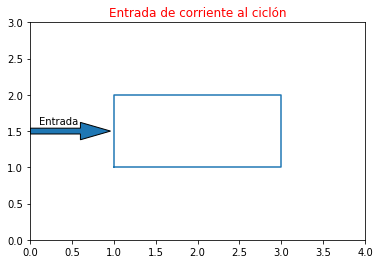

In [ ]:
EntradaCiclon = {"X": [1,1,3,3,1], "Y":[1,2,2,1,1]}
plt.plot(EntradaCiclon["X"], EntradaCiclon["Y"])
bottom, top = plt.ylim()
plt.ylim((0, 3))
left, right = plt.xlim()
plt.xlim((0,4))
plt.arrow(0,1.5, 0.6,0,width=.08)
plt.annotate("Entrada", xy=(0.1,1.6))
plt.title("Entrada de corriente al ciclón", color="r")
plt.show()

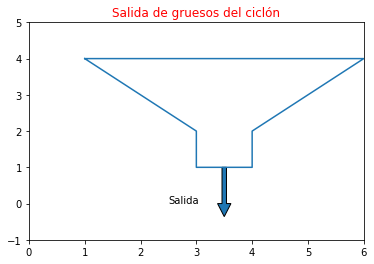

In [ ]:
salidaCiclon = {"X":[1,3,3,4,4,6,1],"Y":[4,2,1,1,2,4,4]}
plt.plot(salidaCiclon["X"], salidaCiclon["Y"])
bottom, top = plt.ylim()
plt.ylim((-1, 5))
left, right = plt.xlim()
plt.xlim((0,6))
plt.arrow(3.5,1, 0,-1,width=.08)
plt.annotate("Salida", xy=(2.5,0))
plt.title("Salida de gruesos del ciclón", color="r")
plt.show()

## Ecuaciones del ciclón

### **Velocidad terminal de la partícula:**
Está velocidad representa la velocidad final o máxima que alcanza una partícula en fluido bajo condiciones de fuerza constante. Esta medida se define como:

$\vec V = {\frac{e_E} {18}} {\frac{\rho_{s}-\rho}{\mu}} D_{p}^{2}$

Donde,

$\vec V$: Es la velocidad de la partícula. <br>
$a_{E}$: Es la aceleración de la partícula.<br>
$\rho_{s}$: Es la densidad de la parícula.<br>
$\rho$: Es la densidad del fluido.<br>
$\mu$: Es la viscosidad dinámica en unidades de $N ⋅ s \cdot m^{-2}$, $Pa \cdot s$ o $kg \cdot m^{-1} s^{-1}$ .<br>
$D_{p}$: Es el diámetro de la partícula.<br>

El parámetro $a_E$ se define a través del producto del cuadrado de la velocidad angular ($\omega$) y su radio ($r$).

$a_{E} = r \cdot \omega^{2} = \frac {r \cdot s^{2}} {r^{2} t^{2}} = \frac {l} {t^{2}}$ <br>
$\omega = \frac {Rad} t$ <br>
$Rad = \frac s r$ <br>
s: es la longitud del arco.

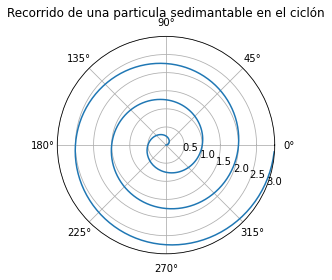

In [ ]:
r = np.arange(0, 3, 0.01) # Rango de radios del ciclón, a modo de ejemplo va de 0 (en la parte final de los gruesos) a 3 (en el borde inicial de la sección cónica).
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2, 2.5, 3])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("Recorrido de una particula sedimantable en el ciclón", va='bottom')
plt.show()

In [ ]:
pd.set_option('display.float_format', '{:.2E}'.format)

In [ ]:
# Para este caso asumamos que aE se ve representada por la aceleración de la gravedad y queremos observar la velocidad de diferentes tamaños de partículas en un ciclón.

DensidadAire = {"Temp":[-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,200,300], "Dens":[1.452,1.395,1.342,1.293,1.247,1.204,1.164,1.127,1.092,1.060,1.030,1.000,.973,.946,.746,.616], "ViscoDin":[1.56E-6,1.61E-6,1.67E-6,1.72E-6,1.76E-6, 1.81E-6,1.86E-6,1.91E-6,1.95E-6,2E-6,2.05E-6,2.09E-6,2.13E-6,2.17E-6,2.57E-6,2.93E-6]} #Densida del aire (kg/m3) a diferentes temperaturas (°C)
DensidadAire = pd.DataFrame(DensidadAire)
DensidadAire


,Temp,Dens,ViscoDin
0,-30,1.45E+00,1.56E-06
1,-20,1.40E+00,1.61E-06
2,-10,1.34E+00,1.67E-06
3,0,1.29E+00,1.72E-06
4,10,1.25E+00,1.76E-06
5,20,1.20E+00,1.81E-06
6,30,1.16E+00,1.86E-06
7,40,1.13E+00,1.91E-06
8,50,1.09E+00,1.95E-06
9,60,1.06E+00,2.00E-06


In [ ]:
DensidadAire.index = DensidadAire.iloc[:, 0]
DensidadAire

,Temp,Dens,ViscoDin
Temp,,,
-30,-30,1.45E+00,1.56E-06
-20,-20,1.40E+00,1.61E-06
-10,-10,1.34E+00,1.67E-06
0,0,1.29E+00,1.72E-06
10,10,1.25E+00,1.76E-06
20,20,1.20E+00,1.81E-06
30,30,1.16E+00,1.86E-06
40,40,1.13E+00,1.91E-06
50,50,1.09E+00,1.95E-06


In [ ]:
# Simulemos un rango de densidades para un conjunto de partículas diferentes de cualquier tipo y un mismo diámetro
def CalcularVelocidades(denIni, denFin,Temp, nSim):
  Densidades = np.linspace(denIni,denFin,nSim)
  Velocidades = (9.81/18)*((Densidades-DensidadAire.loc[Temp,"Dens"])/(DensidadAire.loc[Temp,"ViscoDin"]))*((2.5E-6)**2)#Tamaño de 2.5 micras
  plt.plot(Densidades, Velocidades)
  plt.ylabel("Velocidades m/s")
  plt.xlabel("Densidades kg/m^3")
  plt.show()


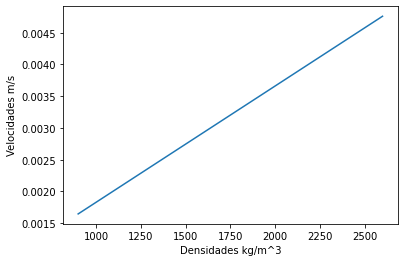

In [ ]:
CalcularVelocidades(900,2600,30,150)

In [ ]:
#Ahora simulemos partículas con diferentes tamaños y una misma densidad

def CalcularVelTam(TamIni, TamFin, denP,Temp, nSim):
  Tamanos = np.linspace(TamIni, TamFin,nSim)
  Velocidades = (9.81/18)*((denP-DensidadAire.loc[Temp,"Dens"])/(DensidadAire.loc[Temp,"ViscoDin"]))*((Tamanos)**2)
  plt.plot(Tamanos, Velocidades)
  plt.ylabel("Velocidades m/s")
  plt.xlabel("Tamaños de partícula, m")
  plt.axvline(2.5E-6, color="#F39C12")
  plt.show()


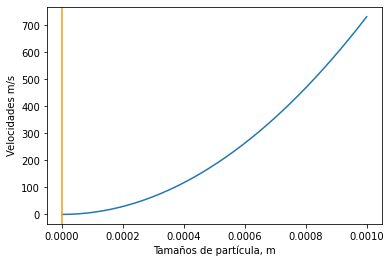

In [ ]:
CalcularVelTam(2E-6,1E-3,2500,30,150)

## **Tamaño crítico de partícula**
Representa el tamaño mínimo de partículas que serán recolectadas por el ciclón. Partículas más pequeñas que el tamaño crítico o mínimo no serán recolectadas. Es por ello que para diseñar ciclones se suele trabajar con cortes X50, que verifican un 50% de recolección de particulas en la salida de los gruesos. <br>

En el escalado de los ciclones se suele trabajar con el número de Stokes (adimensional) y el número de Euler definidos como: <br>
$Stk_{50} = {\frac{X_{50}^{2} \cdot \rho_{p} \cdot \vec V}{18 \cdot \mu \cdot D}}$ <br>
$Euler = {\frac{\Delta P}{\rho \cdot \vec V^{2} \cdot 0.5}}$ <br>
$Euler = \sqrt \frac {12} {Stk_{50}}$ <br>
$\vec V = \frac {4 \cdot Q} {\pi \cdot D^{2}}$ <br>
**Nota**: se recomienda trabajar con caídas de presión entre 50-150 mm de agua (490.5 - 1475.15 Pa a 4°C). La presión en metros es equivalente a $\frac {P}{\rho \cdot g}$, es decir que para convertir esos valores a pascales debemos despejar la presión en metros utilizando la siguiente fórmula, $P = \rho \cdot g \cdot P_{metros}$

### **Ejercicio 1**
Determine el diámetro del ciclón para tratar 2 $m^{3}/s$ de aire ($\mu=18.25E-6$ Pa.s, $\rho= 1.2 \frac {Kg} {m^{3}}$) cargado con sólidos de densidad=1000 $\frac {Kg} {m^{3}}$. La caída de presión óptima es de 1177 Pa, y el tamaño de corte deseado es $x_{50}=4 \mu$. Tome un Euler de 320 y Stk50 1E-4.

In [ ]:
#Paso 1: Crear las funciones que se van a emplear

def VelPorEuler(DeltaP, Euler, DensAire): #Estimar velocidad por la ecuación de Euler
  Division = DeltaP/(DensAire*0.5*Euler)
  Vel = np.sqrt(Division)
  return Vel

def DiametroPorStk(X50, DenP, Vel, Stk50, Viscos ):
  Diametro = (((X50)**2)*DenP*Vel)/(18*Stk50*Viscos)
  return Diametro

def DiametroPorCaudal(Caudal,Vel):
  Diametro = np.sqrt((4*Caudal)/(np.pi* Vel))
  return Diametro

def DeterminarX50(Stk50, Viscos, Diam, DenP, Vel):
  X50 = np.sqrt((Stk50*18*Viscos*Diam)/(DenP*Vel))
  return X50

In [ ]:
#Paso 2: Evaluar parámetros requeridos

Velocidad = VelPorEuler(1177,320,1.2)
DiametroMet1 = DiametroPorStk(4E-6,1000,Velocidad,1E-4,18.25E-6)
DiametroMet2 = DiametroPorCaudal(2,Velocidad)

print("Velocidad estimada: ", Velocidad, " m/s\n", "Diámetro del ciclón por Stokes: ", DiametroMet1, " m\n", "Diámetro del ciclón por Caudal: ", DiametroMet2, " m")

Velocidad estimada:  2.4759257527909297  m/s
 Diámetro del ciclón por Stokes:  1.2059303514354605  m
 Diámetro del ciclón por Caudal:  1.0141477900523572  m


In [ ]:
#Paso 3: Tomamos el diámetro más grande estimado y rectificamos el X50

X50 = DeterminarX50(1E-4,18.25E-6,DiametroMet2,1000,Velocidad)
print(X50*1E6, " micrometros")

3.6681704057271562  micrometros


In [ ]:
#Paso 4: Ahora rectificamos con el diámetro más pequeño

X50Nuevo = DeterminarX50(1E-4,18.25E-6,DiametroMet1,1000,Velocidad)
print(X50Nuevo*1E6, " micrometros")

4.0  micrometros


## **Ejercicio2**
Con base en lo visto en la clase pasada y con lo visto en la clase práctica determine el diámetro de un ciclón que muestra los siguiente resultados (mostrados en la siguiente tabla). Asuma un $\Delta P$ de 75 mm de presión de agua. Tome valores de Euler y Stokes de 320 y 1E-4. **Nota:** El aire que transporta las partículas presenta una temperatura de 50°C, un caudal de 3 $m^{3}/s$, una masa de ingreso de 200 kg y una masa recolectada en la salida de los gruesos de 166.5 kg.

In [ ]:
DatosEjercicio2 = {"TamanoPart":[8E-6,11E-6,16E-6,22E-6, 32E-6,47E-6], "FraccionAlimentacion":[0.05,0.2,0.35,0.25,0.1,0.05], "FraccionEnGruesos": [0.015, 0.139,0.366,0.3,0.12,0.06]}
DatosEjercicio2 = pd.DataFrame(DatosEjercicio2)
DatosEjercicio2
#El tamaño de las partículas está en micrometros

,TamanoPart,FraccionAlimentacion,FraccionEnGruesos
0,8.00E-06,5.00E-02,1.50E-02
1,1.10E-05,2.00E-01,1.39E-01
2,1.60E-05,3.50E-01,3.66E-01
3,2.20E-05,2.50E-01,3.00E-01
4,3.20E-05,1.00E-01,1.20E-01
5,4.70E-05,5.00E-02,6.00E-02


## **Ejercicio 3**
Determine el diámetro de un ciclón que operará con 2.2 $m^{3}/s$. El aire presenta una densidad de 0.5 $kg/m^{3}$ y una viscosidad de $2E-5$ Pa.s y contiene polvo con densidad de 2000 $kg/m^{3}$. Se desea trabajar con un corte ($X_{50}$) de 7 micras y una caída de presión de 1200 Pa. Trabaje con valores de Euler y Stokes de 320 y $1E-4$.

$Stk_{50} = {\frac{X_{50}^{2} \cdot \rho_{p} \cdot \vec V}{18 \cdot \mu \cdot D}}$ <br>
$Euler = {\frac{\Delta P}{\rho \cdot \vec V^{2} \cdot 0.5}}$ <br>
$Euler = \sqrt \frac {12} {Stk_{50}}$ <br>
$\vec V = \frac {4 \cdot Q} {\pi \cdot D^{2}}$ <br>

**Nota**: se recomienda trabajar con caídas de presión entre 50-150 mm de agua (490.5 - 1475.15 Pa a 4°C). La presión en metros es equivalente a $\frac {P}{\rho \cdot g}$, es decir que para convertir esos valores a pascales debemos despejar la presión en metros utilizando la siguiente fórmula, $P = \rho \cdot g \cdot P_{metros}$

In [ ]:
D = 0.5 #Metros

In [ ]:
DensidadAgua = 1000 #kg/m3 

In [ ]:
DensidadAire = 1.2 #kg/m3

In [ ]:
Caudal = 2 #m3/s

In [ ]:
Velocidad = (4*Caudal)/(np.pi*(D**2))
Velocidad

10.185916357881302

In [ ]:
PresionCaida = np.linspace(50/1000, 0.15, 100) * DensidadAgua * 9.81
PresionCaida

array([ 490.5       ,  500.40909091,  510.31818182,  520.22727273,
        530.13636364,  540.04545455,  549.95454545,  559.86363636,
        569.77272727,  579.68181818,  589.59090909,  599.5       ,
        609.40909091,  619.31818182,  629.22727273,  639.13636364,
        649.04545455,  658.95454545,  668.86363636,  678.77272727,
        688.68181818,  698.59090909,  708.5       ,  718.40909091,
        728.31818182,  738.22727273,  748.13636364,  758.04545455,
        767.95454545,  777.86363636,  787.77272727,  797.68181818,
        807.59090909,  817.5       ,  827.40909091,  837.31818182,
        847.22727273,  857.13636364,  867.04545455,  876.95454545,
        886.86363636,  896.77272727,  906.68181818,  916.59090909,
        926.5       ,  936.40909091,  946.31818182,  956.22727273,
        966.13636364,  976.04545455,  985.95454545,  995.86363636,
       1005.77272727, 1015.68181818, 1025.59090909, 1035.5       ,
       1045.40909091, 1055.31818182, 1065.22727273, 1075.13636

In [ ]:
Euler = (PresionCaida)/(DensidadAire* (Velocidad**2)*0.5)
Euler

array([ 7.87929844,  8.03847618,  8.19765393,  8.35683167,  8.51600942,
        8.67518717,  8.83436491,  8.99354266,  9.1527204 ,  9.31189815,
        9.4710759 ,  9.63025364,  9.78943139,  9.94860914, 10.10778688,
       10.26696463, 10.42614237, 10.58532012, 10.74449787, 10.90367561,
       11.06285336, 11.22203111, 11.38120885, 11.5403866 , 11.69956434,
       11.85874209, 12.01791984, 12.17709758, 12.33627533, 12.49545307,
       12.65463082, 12.81380857, 12.97298631, 13.13216406, 13.29134181,
       13.45051955, 13.6096973 , 13.76887504, 13.92805279, 14.08723054,
       14.24640828, 14.40558603, 14.56476377, 14.72394152, 14.88311927,
       15.04229701, 15.20147476, 15.36065251, 15.51983025, 15.679008  ,
       15.83818574, 15.99736349, 16.15654124, 16.31571898, 16.47489673,
       16.63407447, 16.79325222, 16.95242997, 17.11160771, 17.27078546,
       17.42996321, 17.58914095, 17.7483187 , 17.90749644, 18.06667419,
       18.22585194, 18.38502968, 18.54420743, 18.70338518, 18.86

In [ ]:
Stk50 = 12/(Euler**2)
Stk50

array([0.19328856, 0.18570936, 0.17856736, 0.17182958, 0.16546608,
       0.15944964, 0.15375547, 0.14836096, 0.14324546, 0.13839003,
       0.13377736, 0.12939151, 0.12521787, 0.12124295, 0.11745435,
       0.11384058, 0.11039107, 0.107096  , 0.10394629, 0.10093352,
       0.09804985, 0.09528802, 0.09264126, 0.09010327, 0.08766815,
       0.08533044, 0.083085  , 0.08092704, 0.07885208, 0.0768559 ,
       0.07493458, 0.07308442, 0.07130194, 0.06958388, 0.06792718,
       0.06632895, 0.06478647, 0.06329718, 0.06185865, 0.06046861,
       0.05912491, 0.0578255 , 0.05656846, 0.05535197, 0.0541743 ,
       0.05303382, 0.05192898, 0.05085831, 0.04982041, 0.04881396,
       0.04783771, 0.04689045, 0.04597105, 0.04507843, 0.04421156,
       0.04336945, 0.04255118, 0.04175585, 0.04098261, 0.04023065,
       0.0394992 , 0.03878752, 0.0380949 , 0.03742066, 0.03676417,
       0.03612481, 0.03550198, 0.03489512, 0.03430369, 0.03372717,
       0.03316506, 0.03261688, 0.03208219, 0.03156054, 0.03105

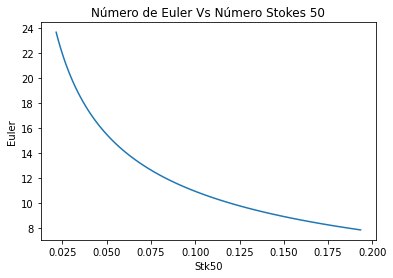

In [ ]:
plt.plot(Stk50,Euler)
plt.xlabel("Stk50")
plt.ylabel("Euler")
plt.title("Número de Euler Vs Número Stokes 50")
plt.show()